In [1]:
from ect.helpers import UnimodalGenerator, MultimodalGenerator, Mode
from ect.tracking import FECTTransformer, DECTTransformer
from ect import Config, complex_to_hsv, ilogpolar_new

import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from matplotlib.cm import binary, magma

### Helpers

In [2]:
CART_XLABEL = 'x'
CART_YLABEL = 'y'
CART_TICKS = [x for x in range(0, 501, 100)]


LOG_RLABEL = '$\\rho$'
LOG_PLABEL = '$\\phi$'
LOG_RTICKS = [x for x in range(0, 201, 50)]
LOG_PTICKS = [x for x in range(0, 629, 157)]


def display_fect(
    cart_image: np.ndarray, 
    logpolar_image: np.ndarray, 
    logpolar_transform: np.ndarray = None,
    cart_transform: np.ndarray = None
) -> None:

    fig, axd = plt.subplot_mosaic(
        [['cartimg', 'logimg', 'logect', 'cartect']],
        figsize = (15, 5),
        width_ratios=[1, 0.4, 0.4, 1]
    )    

    ax: Axes = axd['cartimg']
    ax.imshow(cart_image, cmap=binary)
    ax.set_title("Obraz wejściowy:\nwspółrzędne kartezjańskie")
    ax.set_xlabel(CART_XLABEL)
    ax.set_ylabel(CART_YLABEL)
    ax.set_xticks(CART_TICKS)
    ax.set_yticks(CART_TICKS)

    ax: Axes = axd['logimg']
    ax.imshow(logpolar_image, cmap=binary)
    ax.set_title("Obraz wejściowy:\nwspółrzędne\nlogarytmiczno-polarne")
    ax.set_xlabel(LOG_RLABEL)
    ax.set_ylabel(LOG_PLABEL)
    ax.set_xticks(LOG_RTICKS)
    ax.set_yticks(LOG_PTICKS)

    ax: Axes = axd['cartect']
    ax.imshow(cart_transform)
    ax.set_title("Transformata FECT obrazu:\nwspółrzędne kartezjańskie")
    ax.set_xlabel('$u$')
    ax.set_ylabel('$v$')
    ax.set_xticks(CART_TICKS)
    ax.set_yticks(CART_TICKS)

    ax: Axes = axd['logect']
    ax.imshow(logpolar_transform)
    ax.set_title("Transformata FECT \n obrazu")
    ax.set_xlabel('$\\gamma$')
    ax.set_ylabel('$\\theta$')
    ax.set_xticks(LOG_RTICKS)
    ax.set_yticks(LOG_PTICKS)

def rgb(image: np.ndarray) -> np.ndarray:
    return cv2.cvtColor(image.astype(np.float32), cv2.COLOR_GRAY2RGB)


In [3]:
CART_XLABEL = 'x'
CART_YLABEL = 'y'
CART_TICKS = [x for x in range(0, 501, 100)]


LOG_RLABEL = '$\\rho$'
LOG_PLABEL = '$\\phi$'
LOG_RTICKS = [x for x in range(0, 51, 10)]
LOG_PTICKS = [x for x in range(0, 181, 180//4)]

def display_dect(
    cart_image: np.ndarray, 
    logpolar_image: np.ndarray, 
    cart_transform: np.ndarray = None
) -> None:

    fig, axd = plt.subplot_mosaic(
        [['cartimg', 'logimg', 'cartect']],
        figsize = (10, 5),
        width_ratios=[1, 0.4, 0.4]
    )    

    ax: Axes = axd['cartimg']
    ax.imshow(cart_image, cmap=binary)
    ax.set_title("Obraz wejściowy:\nwspółrzędne kartezjańskie")
    ax.set_xlabel(CART_XLABEL)
    ax.set_ylabel(CART_YLABEL)
    ax.set_xticks(CART_TICKS)
    ax.set_yticks(CART_TICKS)

    ax: Axes = axd['logimg']
    ax.imshow(logpolar_image, cmap=binary)
    ax.set_title("Obraz wejściowy:\nwspółrzędne\nlogarytmiczno-polarne")
    ax.set_xlabel(LOG_RLABEL)
    ax.set_ylabel(LOG_PLABEL)
    ax.set_xticks(LOG_RTICKS)
    ax.set_yticks(LOG_PTICKS)

    ax: Axes = axd['cartect']
    ax.imshow(cart_transform, cmap=magma)
    ax.set_title("Transformata DECT \n obrazu")
    ax.set_xlabel('$\\gamma$')
    ax.set_ylabel('$\\theta$')
    ax.set_xticks(LOG_RTICKS)
    ax.set_yticks(LOG_PTICKS)

def rgb(image: np.ndarray) -> np.ndarray:
    return cv2.cvtColor(image.astype(np.float32), cv2.COLOR_GRAY2RGB)


## FECT

### Unimodal image

In [4]:
DSIZE = (180,50)
CFG = Config(ect_offset_value_px=0, offset_value_px=0)

SINGLE_MODE = Mode(100, 45)
MULTI_MODE = [Mode(50, 90, 3), Mode(50, 45, 3), Mode(50, 135, 3)]
OFFSET = 10

2024-06-13 21:23:58.971 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10.0


2024-06-13 21:23:58.974 | DEBUG    | ect.maps.logpolar_new:logpolar:62 - Applying bilinear pixel mapping
2024-06-13 21:23:58.994 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=0.0
2024-06-13 21:23:58.996 | DEBUG    | ect.maps.logpolar_new:logpolar:62 - Applying bilinear pixel mapping
2024-06-13 21:23:59.006 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:78 - Running logpolar transform in offset mode
2024-06-13 21:23:59.025 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:94 - Applying bilinear pixel mapping


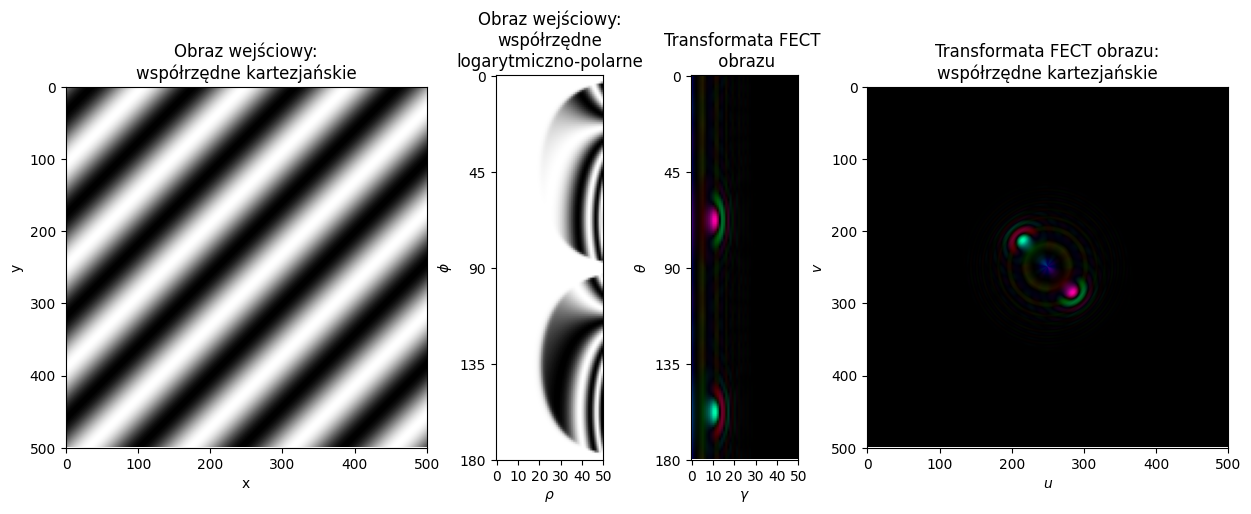

In [5]:
gen = UnimodalGenerator(SINGLE_MODE, dsize=DSIZE)
gen_cart = UnimodalGenerator(SINGLE_MODE, dsize=DSIZE, logpolar=False)
tr = FECTTransformer(cfg=CFG, dsize=DSIZE)


cart_img = gen_cart.generate()
log_img = gen.generate()

log_ect = tr.transform(cart_img)
log_ect_d = complex_to_hsv(log_ect)

ilp = lambda x: ilogpolar_new(x, (500, 500), 5, Config(offset_value_px=0))

cart_ect = ilp(log_ect)
cart_ect_d = complex_to_hsv(cart_ect)

display_fect(cart_img, log_img, log_ect_d, cart_ect_d)

### Multimodal image

2024-06-13 21:24:00.287 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10.0


2024-06-13 21:24:00.292 | DEBUG    | ect.maps.logpolar_new:logpolar:62 - Applying bilinear pixel mapping
2024-06-13 21:24:00.337 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=0.0
2024-06-13 21:24:00.339 | DEBUG    | ect.maps.logpolar_new:logpolar:62 - Applying bilinear pixel mapping
2024-06-13 21:24:00.355 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:78 - Running logpolar transform in offset mode
2024-06-13 21:24:00.378 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:94 - Applying bilinear pixel mapping


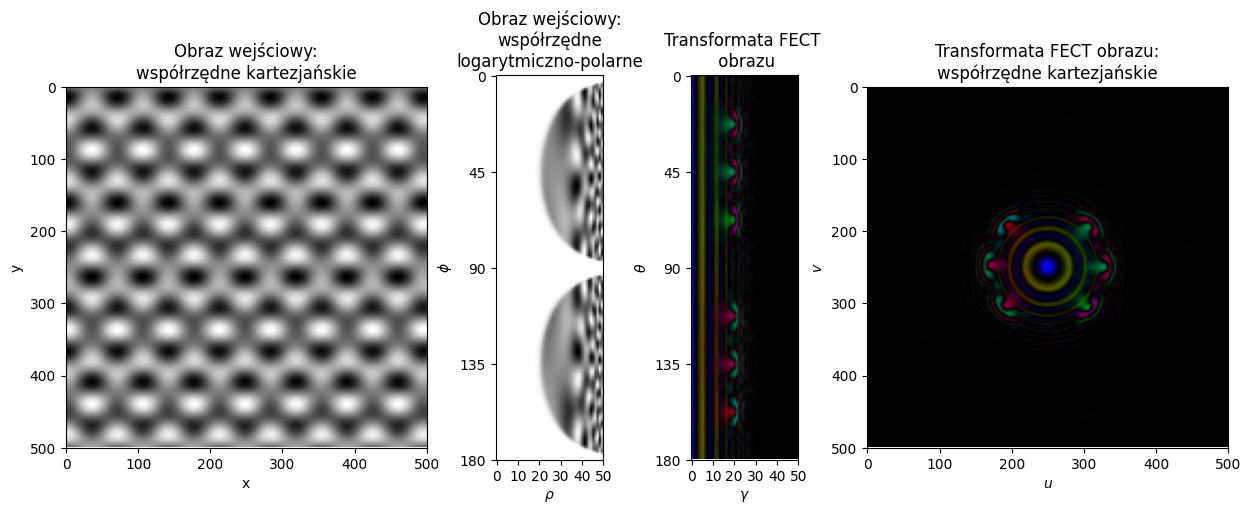

In [6]:

gen = MultimodalGenerator(MULTI_MODE, dsize=DSIZE)
gen_cart = MultimodalGenerator(MULTI_MODE, dsize=DSIZE, logpolar=False)
tr = FECTTransformer(cfg=Config(ect_offset_value_px=0, offset_value_px=0), dsize=DSIZE)


cart_img = gen_cart.generate()
log_img = gen.generate()

log_ect = tr.transform(cart_img)
# log_ect[:, :20] = 0


log_ect_d = complex_to_hsv(log_ect)

ilp = lambda x: ilogpolar_new(x, (500, 500), 5, Config(offset_value_px=0))

cart_ect = ilp(log_ect)
cart_ect_d = complex_to_hsv(cart_ect)

display_fect(cart_img, log_img, log_ect_d, cart_ect_d)

## DECT

### Unimodal Image

In [7]:
def center(inp: np.ndarray, invfunc = lambda x: x) -> np.ndarray:
    X, Y = inp.shape
    inp = invfunc(inp)
    out = np.zeros_like(inp)
    out[:X//2, :Y//2] = inp[X//2:, Y//2:]
    out[X//2:, :Y//2] = inp[:X//2, Y//2:]
    out[X//2:, Y//2:] = inp[:X//2, :Y//2]
    out[:X//2, Y//2:] = inp[X//2:, :Y//2]
    return out

In [8]:
CFG.antialias_params = [0.0, 0.0]

gen = UnimodalGenerator(SINGLE_MODE, dsize=DSIZE)
gen_cart = UnimodalGenerator(SINGLE_MODE, dsize=DSIZE, logpolar=False)
tr = DECTTransformer(cfg=CFG, dsize=DSIZE)

cart_img = gen_cart.generate()
log_img = gen.generate()

log_ect = tr.transform(log_img, logpolar=False)

2024-06-13 21:24:01.279 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10.0
2024-06-13 21:24:01.281 | DEBUG    | ect.maps.logpolar_new:logpolar:62 - Applying bilinear pixel mapping
100%|██████████| 50/50 [00:03<00:00, 12.54it/s]


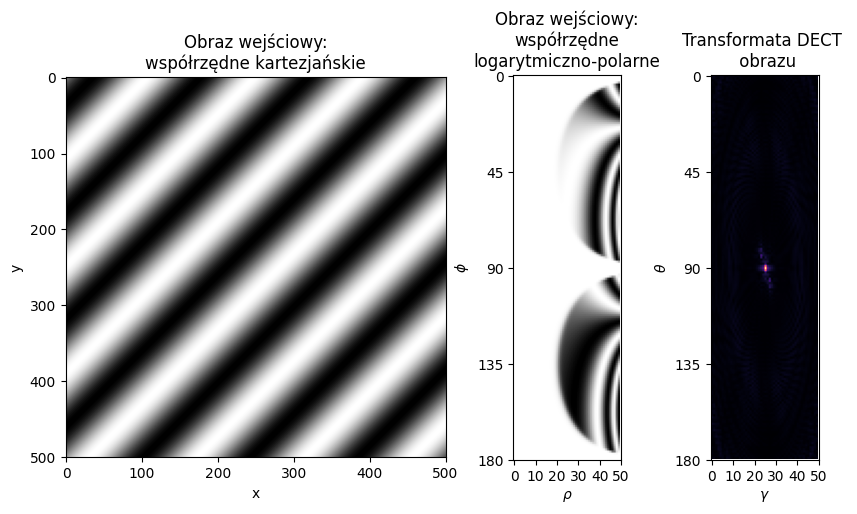

In [9]:
log_ect_d = center(log_ect, lambda x: cv2.normalize(np.abs(x), None, 0, 1, cv2.NORM_MINMAX))

display_dect(cart_img, log_img, log_ect_d)

### Multimodal Image

2024-06-13 21:24:05.593 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10.0
2024-06-13 21:24:05.594 | DEBUG    | ect.maps.logpolar_new:logpolar:62 - Applying bilinear pixel mapping
  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:02<00:00, 21.62it/s]


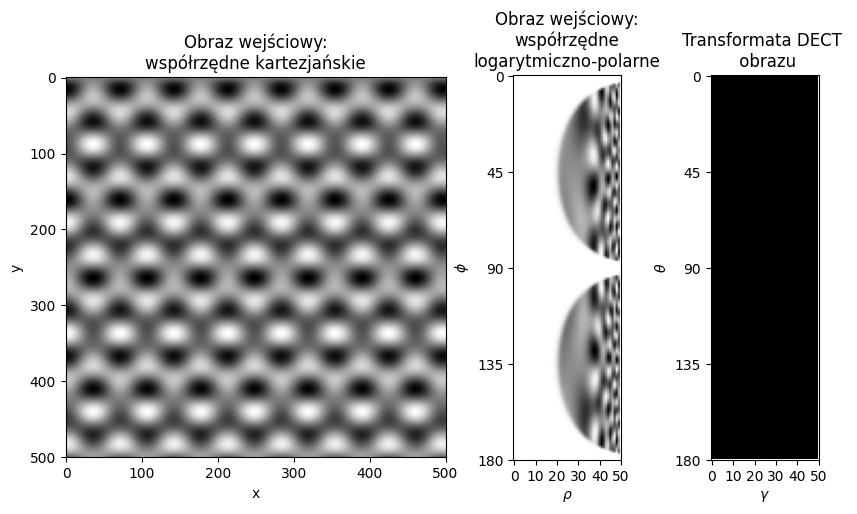

In [10]:

gen = MultimodalGenerator(MULTI_MODE, dsize=DSIZE, offset=OFFSET)
gen_cart = MultimodalGenerator(MULTI_MODE, dsize=DSIZE, logpolar=False, offset=OFFSET)
tr = DECTTransformer(cfg=CFG, dsize=DSIZE)

cart_img = gen_cart.generate()
log_img = gen.generate()

log_ect = tr.transform(log_img, logpolar=False)
log_ect_d = center(log_ect, lambda x: cv2.normalize(complex_to_hsv(x), None, 0, 1, cv2.NORM_MINMAX))

display_dect(cart_img, log_img, log_ect_d)